In [1]:
import os, sys
sys.path.append('../SoSeq-segment')
from utils.io import *

In [10]:
! squeue -u csw14

             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
           1892476       gpu     bash    csw14 PD       0:00      1 (Resources)
           1892544       gpu     wrap    csw14 PD       0:00      1 (Priority)
           1892543       gpu     wrap    csw14 PD       0:00      1 (Priority)
           1886237 interacti     bash    csw14  R    1:32:12      1 compute-a-16-171


In [3]:
video_lenghts = get_video_lengths('../data')

ffprobe -v error -select_streams v:0 -show_entries stream=nb_frames -of default=nokey=1:noprint_wrappers=1 ../data/19_11_30-GRIN3-MB.000371392012_color.mp4
ffprobe -v error -select_streams v:0 -show_entries stream=nb_frames -of default=nokey=1:noprint_wrappers=1 ../data/19_12_1-C57_GRIN5-solo.000371392012_color.mp4
ffprobe -v error -select_streams v:0 -show_entries stream=nb_frames -of default=nokey=1:noprint_wrappers=1 ../data/19_11_21-C57_GRIN3-MK-000371392012_color.mp4
ffprobe -v error -select_streams v:0 -show_entries stream=nb_frames -of default=nokey=1:noprint_wrappers=1 ../data/19_11_25-C57_GRIN5-MB-000371392012_color.mp4
ffprobe -v error -select_streams v:0 -show_entries stream=nb_frames -of default=nokey=1:noprint_wrappers=1 ../data/19_11_26-C57_GRIN3-MG-000371392012_color.mp4
ffprobe -v error -select_streams v:0 -show_entries stream=nb_frames -of default=nokey=1:noprint_wrappers=1 ../data/19_12_2-C57_GRIN5-solo.000371392012_color.mp4
ffprobe -v error -select_streams v:0 -show

In [4]:
for k in video_lenghts:
    os.system('sbatch -p short -t 12:00:00 --mem 8GB --wrap """module load ffmpeg; ffmpeg -i ../data/'+k+' -filter:v "crop=540:480:300:100" data_cropped/'+k+'"""')
 

# for k in video_lenghts:
#     os.system('sbatch -p short -t 12:00:00 --mem 8GB --wrap """conda activate soseq; python crop.py '+k+'"""')

In [24]:
ls data_cropped

19_11_19-C57_GRIN3-MR-000371392012_color.mp4
19_11_19-C57_GRIN3-MR-000371392012_depth.avi
19_11_21-C57_GRIN3-MK-000371392012_color.mp4
19_11_21-C57_GRIN3-MK-000371392012_depth.avi
19_11_21-C57_GRIN5-MG-000371392012_color.mp4
19_11_21-C57_GRIN5-MG-000371392012_depth.avi
19_11_24-C57_GRIN5-solo-000371392012_color.mp4
19_11_24-C57_GRIN5-solo-000371392012_depth.avi
19_11_25-C57_GRIN5-MB-000371392012_color.mp4
19_11_25-C57_GRIN5-MB-000371392012_depth.avi
19_11_26-C57_GRIN3-MG-000371392012_color.mp4
19_11_26-C57_GRIN3-MG-000371392012_depth.avi
19_11_30-GRIN3-MB.000371392012_color.mp4
19_11_30-GRIN3-MB.000371392012_depth.avi
19_12_1-C57_GRIN5-solo.000371392012_color.mp4
19_12_1-C57_GRIN5-solo.000371392012_depth.avi
19_12_2-C57_GRIN3-solo.000371392012_color.mp4
19_12_2-C57_GRIN3-solo.000371392012_depth.avi
19_12_2-C57_GRIN5-solo.000371392012_color.mp4
19_12_2-C57_GRIN5-solo.000371392012_depth.avi
out.mp4


In [20]:
! ffmpeg -i ../data/19_11_27-GRIN5-MG.000371392012_color.mp4 -filter:v "crop=540:480:300:100" data_cropped/out.mp4

ffmpeg version 3.3.3-static http://johnvansickle.com/ffmpeg/  Copyright (c) 2000-2017 the FFmpeg developers
  built with gcc 6.4.0 (Debian 6.4.0-2) 20170724
  configuration: --enable-gpl --enable-version3 --enable-static --disable-debug --disable-ffplay --disable-indev=sndio --disable-outdev=sndio --cc=gcc-6 --enable-fontconfig --enable-frei0r --enable-gnutls --enable-gray --enable-libass --enable-libfreetype --enable-libfribidi --enable-libmp3lame --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenjpeg --enable-libopus --enable-librtmp --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libvidstab --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxvid --enable-libzimg
  libavutil      55. 58.100 / 55. 58.100
  libavcodec     57. 89.100 / 57. 89.100
  libavformat    57. 71.100 / 57. 71.100
  libavdevice    57.  6.100 / 57.  6.100
  libavfilter     6. 82.100 /  6. 82.100
  libswscale   

In [23]:
color_pipe = None
depth_pipe = None
for k,l in video_lenghts.items():
    for frame in range(53600,53980,100):
        cc = read_color_frames('../data/'+k, range(frame,np.min([frame+100,l])), frame_size=(1280,720))
        color_pipe = write_color_frames('data_cropped/'+k,
                                        cc[:,100:580,300:840,:],
                                        pipe=color_pipe, 
                                        close_pipe=False, fps=30,
                                        pixel_format='rgb24', 
                                        codec='h264')
        dd = read_depth_frames16('../data/'+k.replace('color.mp4','depth.avi'), range(frame,np.min([frame+100,l])), frame_size=(1280,720))
        depth_pipe = write_depth_frames16('data_cropped/'+k.replace('color.mp4','depth.avi'),
                                        dd[:,100:580,300:840], 
                                        pipe=depth_pipe, 
                                        close_pipe=False, fps=30)
        
        print(k,frame)
    break
        
color_pipe.stdin.close()
depth_pipe.stdin.close()


KeyboardInterrupt: 

In [14]:
'data_cropped/'+k

'data_cropped/19_11_30-GRIN3-MB.000371392012_color.mp4'

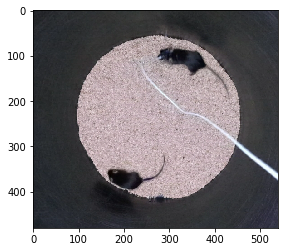

In [19]:
im = read_color_frames('../data/19_11_19-C57_GRIN5-MB-000371392012_color.mp4',[400], frame_size=(1280,720)).squeeze()
plt.imshow(im[100:580,300:840])



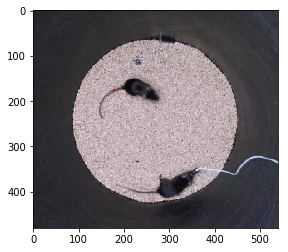

In [18]:
im = read_color_frames('../data/19_11_19-C57_GRIN3-MR-000371392012_color.mp4',[400], frame_size=(1280,720)).squeeze()
plt.imshow(im[100:580,300:840])

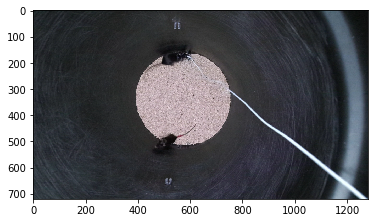

In [15]:
im = read_color_frames('../data/19_11_20-C57_GRIN5-MR-000371392012_color.mp4',[400], frame_size=(1280,720)).squeeze()
plt.imshow(im)

In [33]:
'../data/'+k.replace('color.mp4','depth.avi')

'../data/19_11_30-GRIN3-MB.000371392012_depth.avi'

In [38]:
! du -hs ../data/19_11_30-GRIN3-MB.000371392012_depth.avi

4.2G	../data/19_11_30-GRIN3-MB.000371392012_depth.avi


In [37]:
ls ../data/

19_11_19-C57_GRIN3-MR-000371392012_color.mp4*
19_11_19-C57_GRIN3-MR-000371392012_depth.avi*
19_11_19-C57_GRIN5-MB-000371392012_color.mp4*
19_11_19-C57_GRIN5-MB-000371392012_depth.avi*
19_11_20-C57_GRIN3-MG-000371392012_color.mp4*
19_11_20-C57_GRIN3-MG-000371392012_depth.avi*
19_11_20-C57_GRIN5-MR-000371392012_color.mp4*
19_11_20-C57_GRIN5-MR-000371392012_depth.avi*
19_11_21-C57_GRIN3-MK-000371392012_color.mp4*
19_11_21-C57_GRIN3-MK-000371392012_depth.avi*
19_11_21-C57_GRIN5-MG-000371392012_color.mp4*
19_11_21-C57_GRIN5-MG-000371392012_depth.avi*
19_11_22-C57_GRIN5-MK-000371392012_color.mp4*
19_11_22-C57_GRIN5-MK-000371392012_depth.avi*
19_11_23-C57_GRIN3-solo-000371392012_color.mp4*
19_11_23-C57_GRIN3-solo-000371392012_depth.avi*
19_11_23-C57_GRIN5-solo-000371392012_color.mp4*
19_11_23-C57_GRIN5-solo-000371392012_depth.avi*
19_11_24-C57_GRIN3-solo-000371392012_color.mp4*
19_11_24-C57_GRIN3-solo-000371392012_depth.avi*
19_11_24-C57_GRIN5-solo-000371392012_color.mp4*
19_11_24-C57_GRIN5-s